# Classification - Credit Score


You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts. Given a person’s credit-related information, build a machine learning model that can classify the credit score

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from autoviz import data_cleaning_suggestions   
#from pycaret import classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Credit_Score_Classification_Dataset.csv')
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [3]:
df.nunique()

Age                   29
Gender                 2
Income                52
Education              5
Marital Status         2
Number of Children     4
Home Ownership         2
Credit Score           3
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [5]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [6]:
df.isna().any()

Age                   False
Gender                False
Income                False
Education             False
Marital Status        False
Number of Children    False
Home Ownership        False
Credit Score          False
dtype: bool

In [7]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [8]:
cat_cols = df.select_dtypes(include = ['object']).columns.tolist()
cat_cols

['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

for i in cat_cols:
    # Fit the label encoder object to the dataset
    le.fit(df[i])

    # Transform the dataset using the label encoder object
    df[i] = le.transform(df[i])
# get list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols

[]

In [10]:
df.corr()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
Age,1.000000,0.235343,0.699464,0.170254,-0.517723,0.055390,-0.713803,0.205362
Gender,0.235343,1.000000,0.495738,0.248671,0.278362,-0.442139,-0.031519,-0.247729
Income,0.699464,0.495738,1.000000,0.369449,-0.471004,0.084547,-0.704928,0.083698
Education,0.170254,0.248671,0.369449,1.000000,-0.067797,0.047311,-0.397043,0.334424
Marital Status,-0.517723,0.278362,-0.471004,-0.067797,1.000000,-0.696984,0.708374,-0.205756
Number of Children,0.055390,-0.442139,0.084547,0.047311,-0.696984,1.000000,-0.497129,0.136517
Home Ownership,-0.713803,-0.031519,-0.704928,-0.397043,0.708374,-0.497129,1.000000,-0.293384
Credit Score,0.205362,-0.247729,0.083698,0.334424,-0.205756,0.136517,-0.293384,1.000000


<AxesSubplot: >

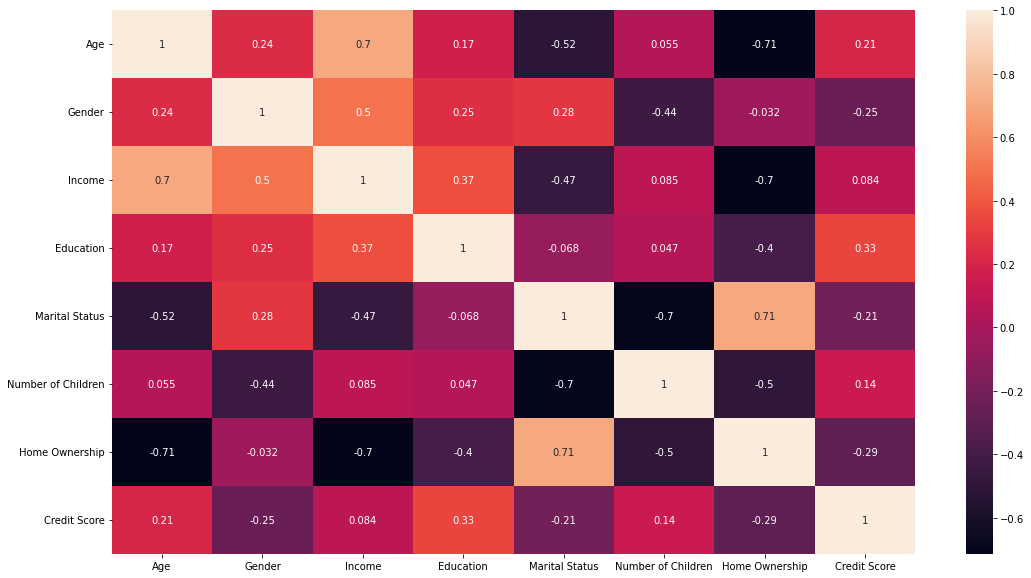

In [11]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(18,10))

sns.heatmap(df.corr(), annot = True)

In [12]:
# Count the number of instances in each class
class_counts = df['Credit Score'].value_counts()

# Print the class distribution
print('Class distribution:')
print(class_counts)

Class distribution:
1    113
0     36
2     15
Name: Credit Score, dtype: int64


In [17]:
X = df.drop('Credit Score', axis = 1)
y = df['Credit Score']
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from imblearn.over_sampling import SMOTE   #conda install -c conda-forge imbalanced-learn    pip install imblearn

# Instantiate SMOTE
sm = SMOTE(random_state=42)

# Fit SMOTE to training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Print class distribution of original and resampled data
print('Class distribution before resampling:', y_train.value_counts())
print('Class distribution after resampling:', y_train_res.value_counts())

Class distribution before resampling: 1    90
0    31
2    10
Name: Credit Score, dtype: int64
Class distribution after resampling: 1    90
0    90
2    90
Name: Credit Score, dtype: int64


In [26]:
data_cleaning_suggestions(df)

    Alert: Dropping 62 duplicate rows can sometimes cause column data types to change to object. Double-check!


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Age,int64,0.000000,28,25,53,No issue
Gender,int32,0.000000,1,0,1,No issue
Income,int64,0.000000,50,25000,162500,No issue
Education,int32,0.000000,4,0,4,No issue
Marital Status,int32,0.000000,1,0,1,No issue
Number of Children,int64,0.000000,3,0,3,has 4 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Home Ownership,int32,0.000000,1,0,1,No issue
Credit Score,int32,0.000000,2,0,2,has 27 outliers greater than upper bound (1.00) or lower than lower bound(1.00). Cap them or remove them.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Age,int64,0.0,28,25,53,No issue
Gender,int32,0.0,1,0,1,No issue
Income,int64,0.0,50,25000,162500,No issue
Education,int32,0.0,4,0,4,No issue
Marital Status,int32,0.0,1,0,1,No issue
Number of Children,int64,0.0,3,0,3,has 4 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Home Ownership,int32,0.0,1,0,1,No issue
Credit Score,int32,0.0,2,0,2,has 27 outliers greater than upper bound (1.00) or lower than lower bound(1.00). Cap them or remove them.


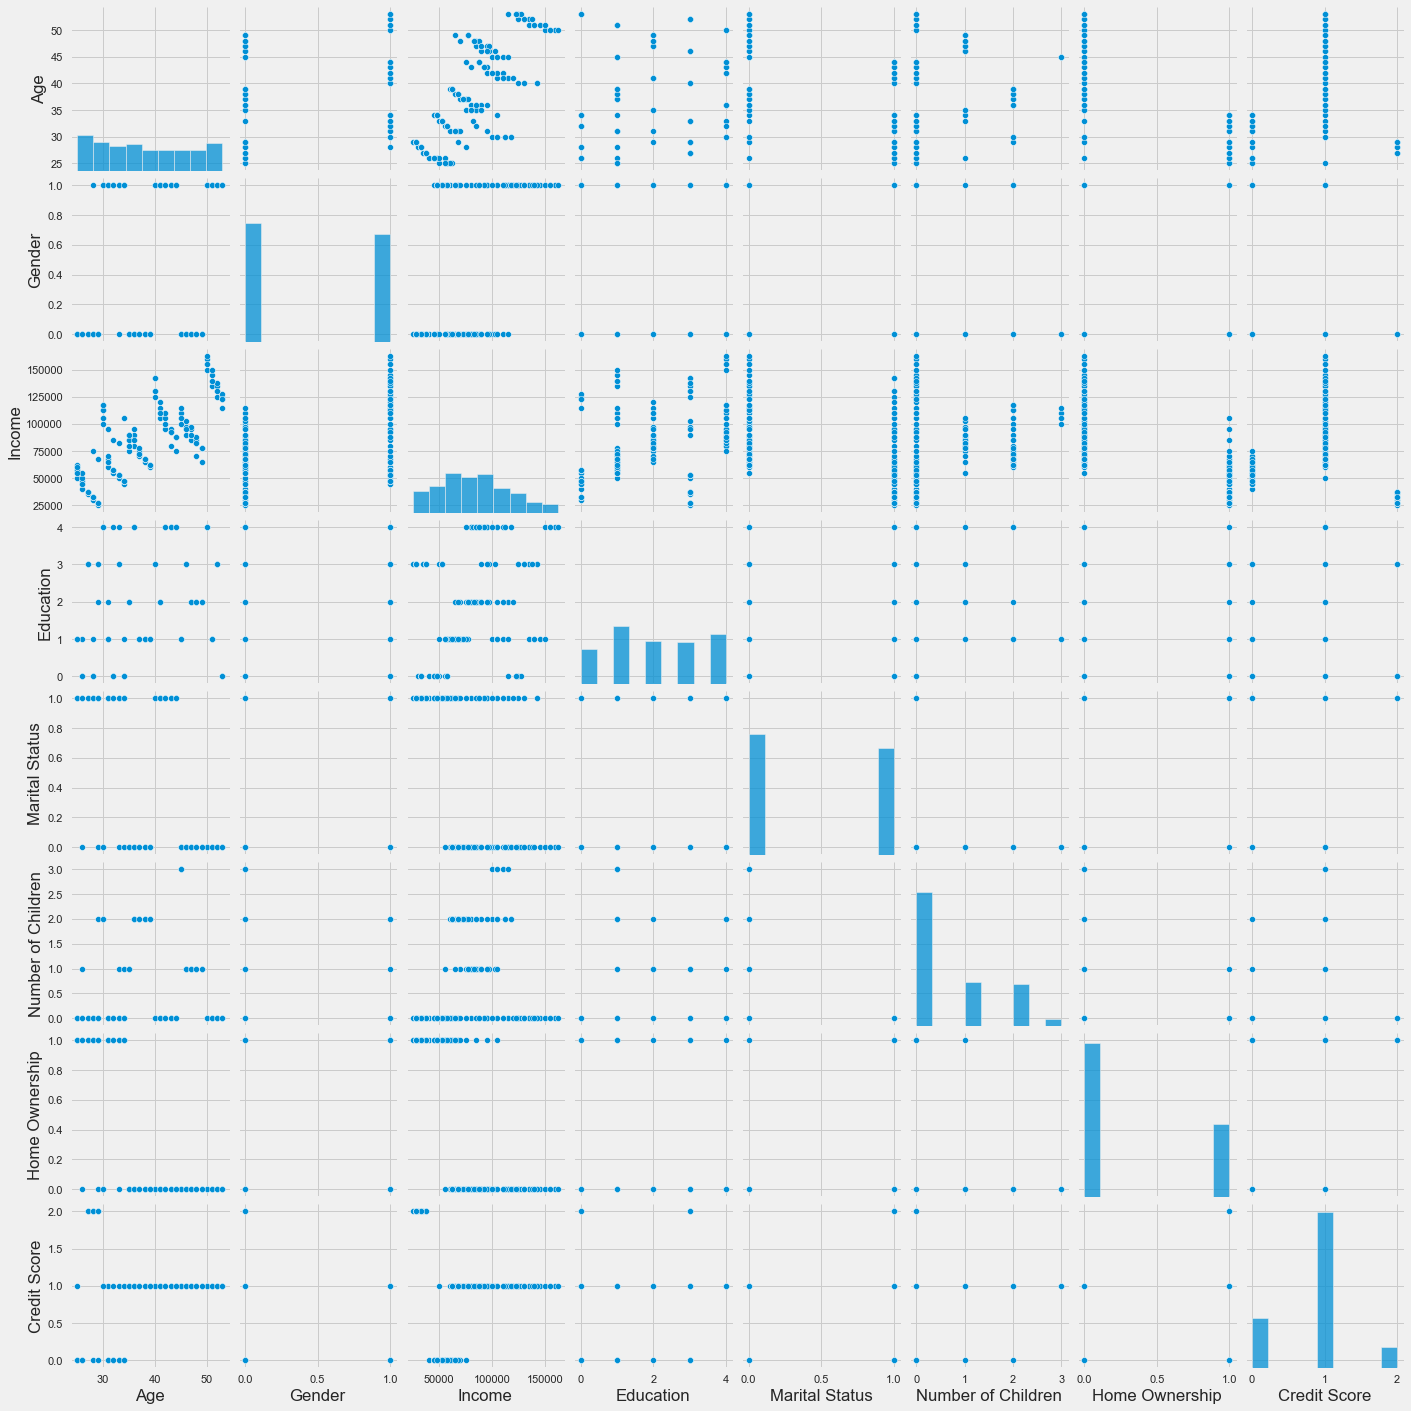

In [27]:
sns.pairplot(df)

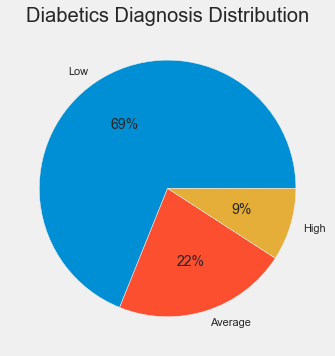

In [28]:
# Count the number of instances in each class
class_counts = df['Credit Score'].value_counts()

# Create a list of labels
labels = ["Low", "Average", "High"]

# Create a list of values
values = class_counts.values

# Plot the pie chart
plt.pie(values, labels=labels, autopct="%1.0f%%")

# Add a title
plt.title("Diabetics Diagnosis Distribution")

# Show the plot
plt.show()

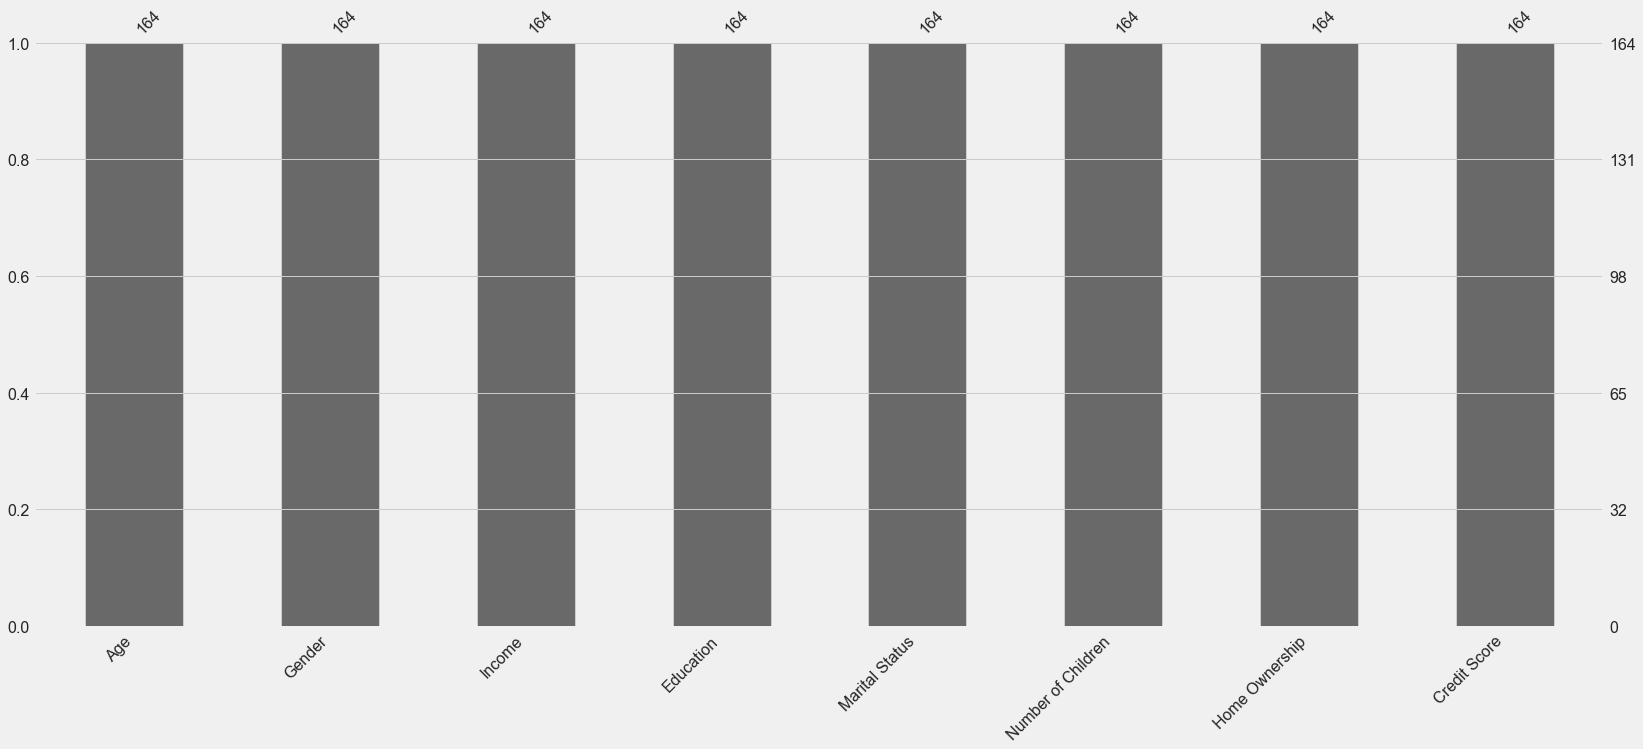

In [30]:
import missingno as msno
# Null count analysis
null_plot = msno.bar(df)

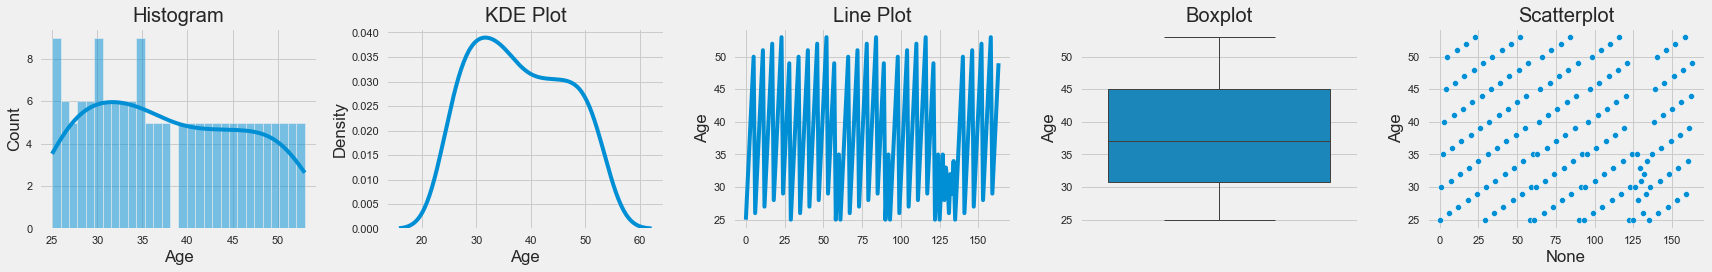

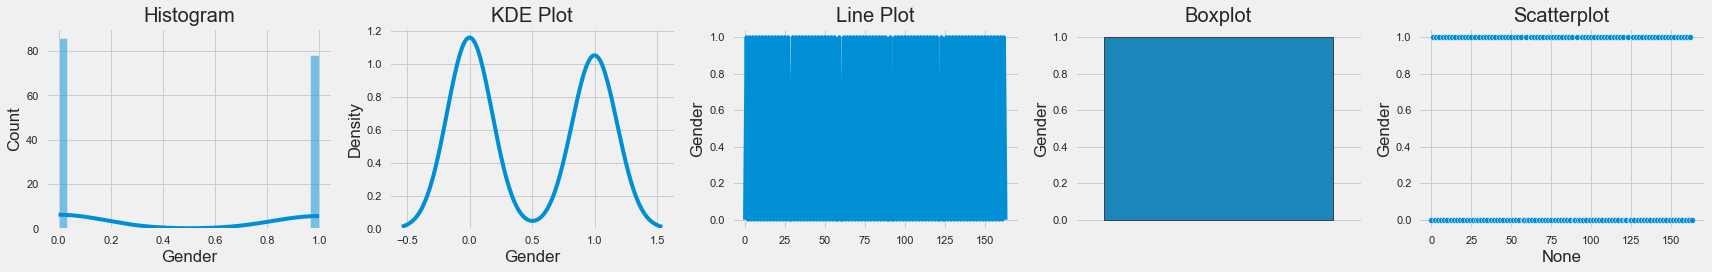

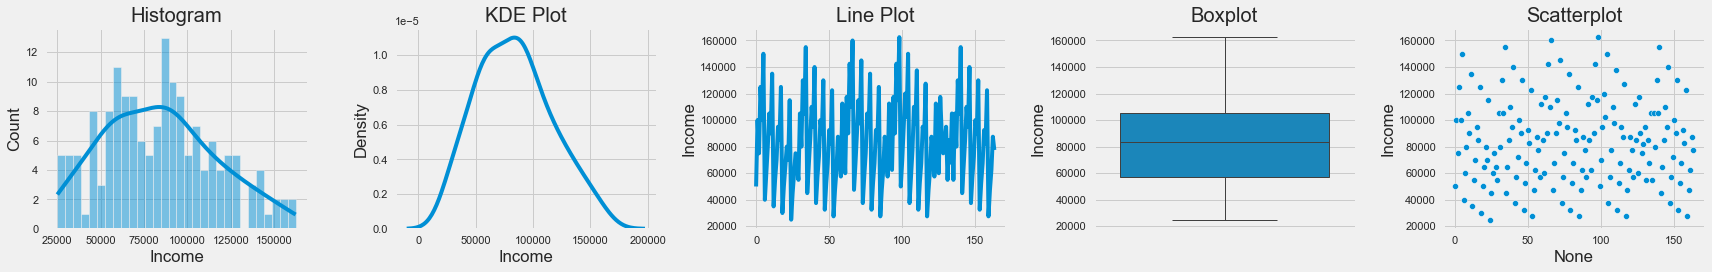

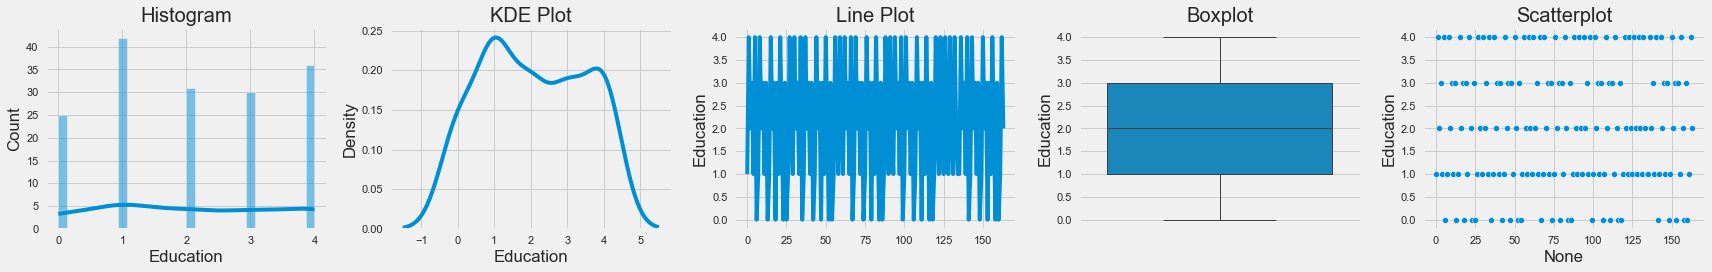

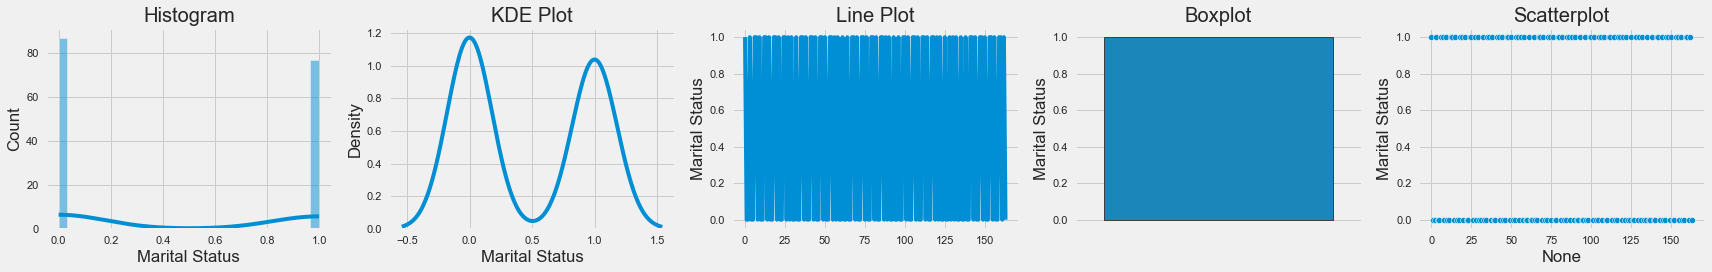

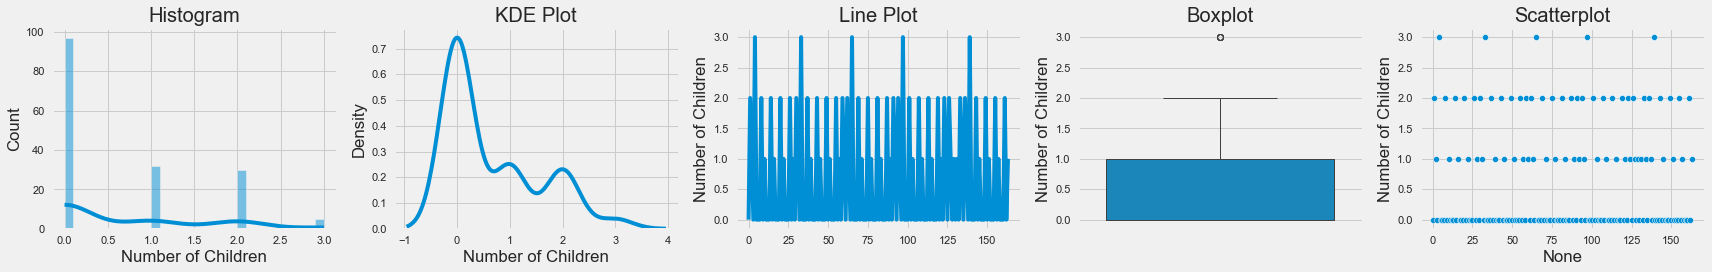

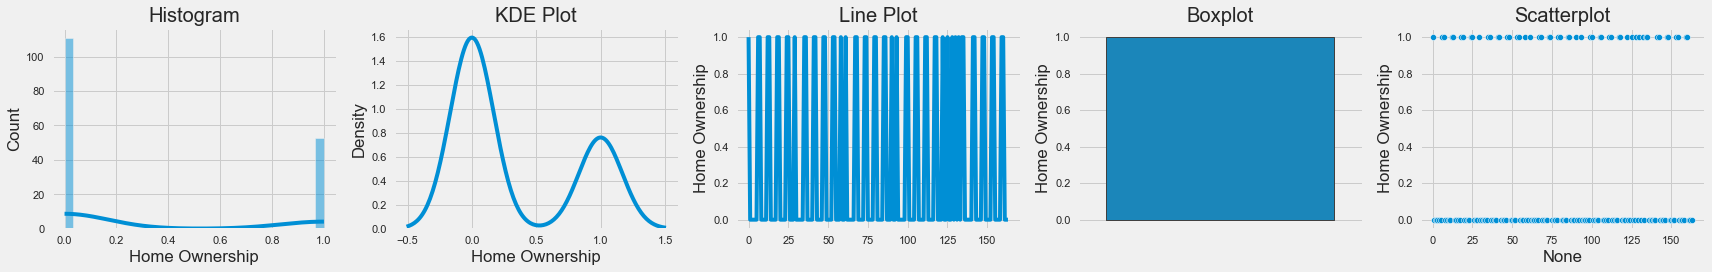

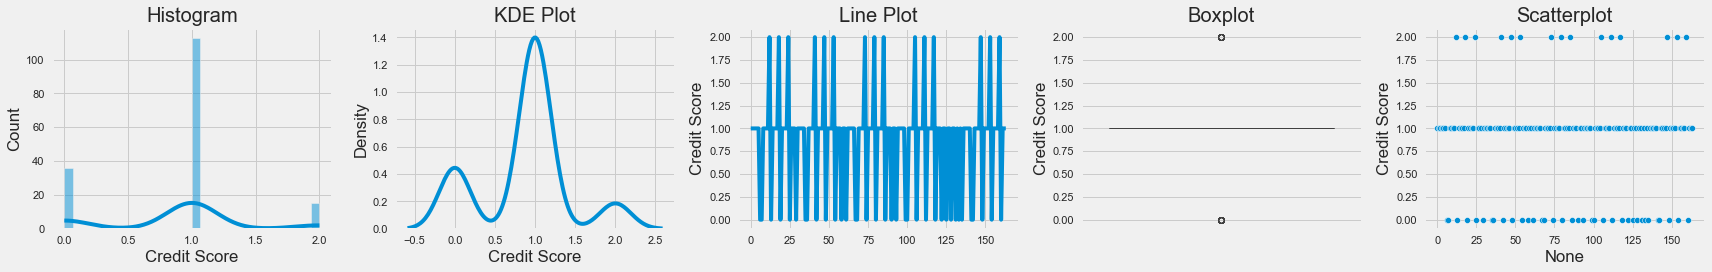

In [31]:
def plots(df, variable):
  if df[variable].dtype != object:
    # define figure size
    fig, ax = plt.subplots(1, 5, figsize=(24, 4))
    
    # histogram
    sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
    ax[0].set_title('Histogram')
    
    # KDE plot
    sns.kdeplot(df[variable], ax=ax[1])
    ax[1].set_title('KDE Plot')
    
    # Line plot
    sns.lineplot(df[variable], ax=ax[2])
    ax[2].set_title('Line Plot')
    
    # boxplot
    sns.boxplot(y=df[variable], ax=ax[3])
    ax[3].set_title('Boxplot')
    
    # scatterplot
    sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
    ax[4].set_title('Scatterplot')
    
    plt.tight_layout()
    plt.show()

for i in df.columns:
    plots(df ,i)